<a href="https://colab.research.google.com/github/jesspl/prediction/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 2 - Parte 2 (base)

 Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.

Comprometan su archivo al repositorio Github y envíen el enlace abajo.

#Feature Description


is_canceled : Value indicating if the booking was canceled (1) or not (0) - Target feature

hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality 
meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab_notebooks/coding_dojo/proyecto_final/hotel_bookings.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000




Se evidencia una cantidad alta de informacion duplicada que equivale al 26.8%  (31994 datos) de la muestra, igual se decide eliminar esta información ya que puede generar sesgos.

In [3]:
#revision de datos duplicados
du=df.duplicated().sum() 
porcent = (du/119390)*100
print(porcent)

26.797889270458164


Eliminacion de valores duplicados


In [4]:
# Removiendo valores duplicados
df = df.drop_duplicates()
df.duplicated().sum() #se observa que no hay datos duplicados

0

In [5]:
# Revisar el numero de columnas y datos vacios
print(df.info(), '\n') 
df.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


#Valores categoricos


_________________________________________________

revisando la informacion de los valores categoricos

In [6]:
# Se imprimen los velores unicos de cada categoria

categorical_features = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', \
    'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

print(f"Unique values by features\n")

for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f"{feature}:\n {unique_values}\n")

Unique values by features

hotel:
 ['Resort Hotel' 'City Hotel']

is_canceled:
 [0 1]

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 

#Revisando valores vacios 
-----------------------------------

Se evidencia una cantidad importante de valores vacios en las colmnas agent y company. se decide por ello eliminar las columnas.

para el caso de Country se reasignara un valor como other o non para lugar no concido y se eliminara e valor de cildren que este vacio.

In [7]:
# Check missing/null value in %

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           93.98
agent                             13.95
country                            0.52
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


 - Se eliminan datos de adultos en 0 ya que no tiene sentido vacaciones de menores de edad por booking,
- Seria aplicable a una excurcion de adolecentes pero no es el caso

In [8]:
df = df[df['adults'] != 0]
#dt = df[(df.BathHalfCount == 0) & (df.BathFullCount	 == 0) & (df.Bath3qtrCount		 == 0)]

Se decide eliminar las columnas company y agent ya que los agentes de viaje son directamente relacionables a las compañias a las que pertenecen y al tener tan poca informacion de las compañias que mas autilizan los usuarios es mejor precindir de estas y enfocar en las epocas y las preferencias de usuario


In [9]:
df.drop(['company', 'agent'], axis = 'columns', inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Se decide eliminar los datos vacios donde no especifique niños y se reasiganara un campo donde no es epecifique pais de destino como Nun

In [10]:
df['country'] = df['country'].fillna('Noum')

<ipython-input-10-c2327276752b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna('Noum')


In [11]:
df['children']= df['children'].fillna(0)

<ipython-input-11-74cff63acf80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children']= df['children'].fillna(0)


In [12]:
#df['total_guest'] = df['children'] + df['babies'] + df['adults']

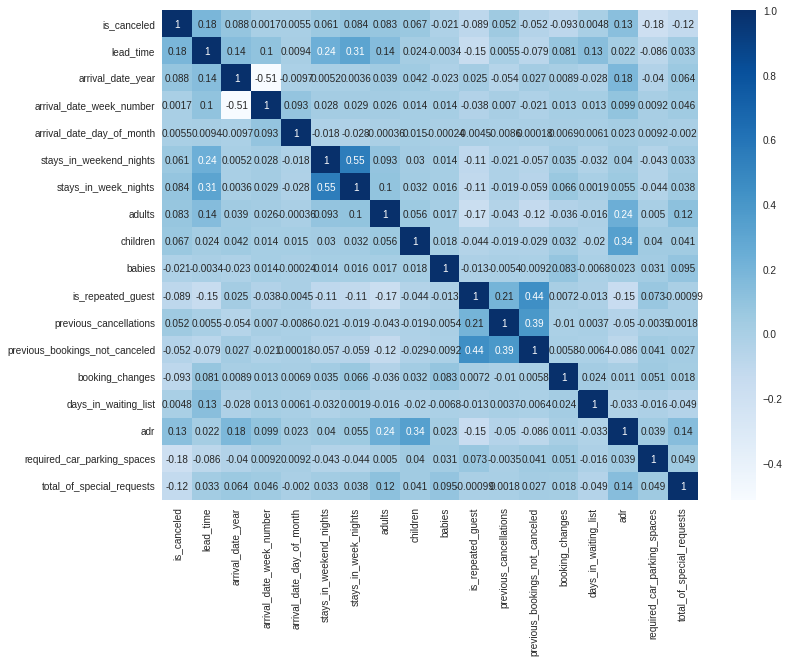

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn")
plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.show()

#Relacion de mayor cantidad de visitas
_______________________________________

Se relaciona los mese donde mas visitas se realizan durante el año.

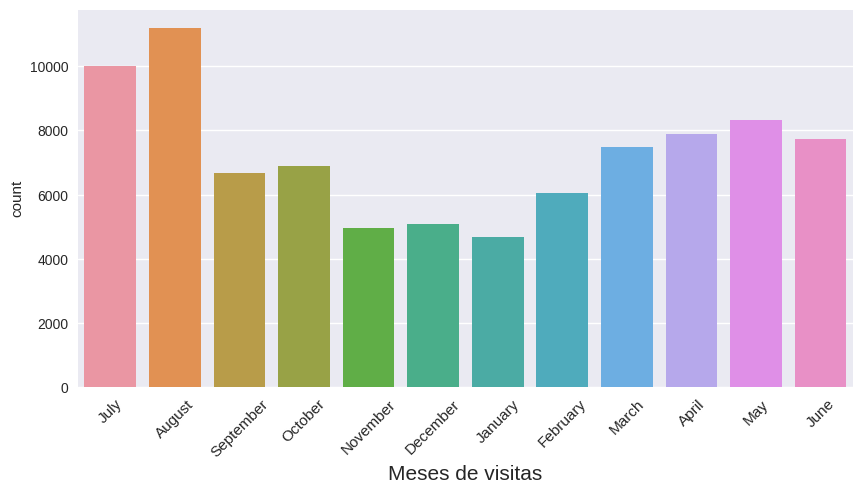

In [14]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Meses de visitas', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

#Se revisa una correlacion

_________________________________________

Esto con el fin de visualizar de mejor manera los componentes a acorrelacionar

In [15]:
import datetime as dt
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

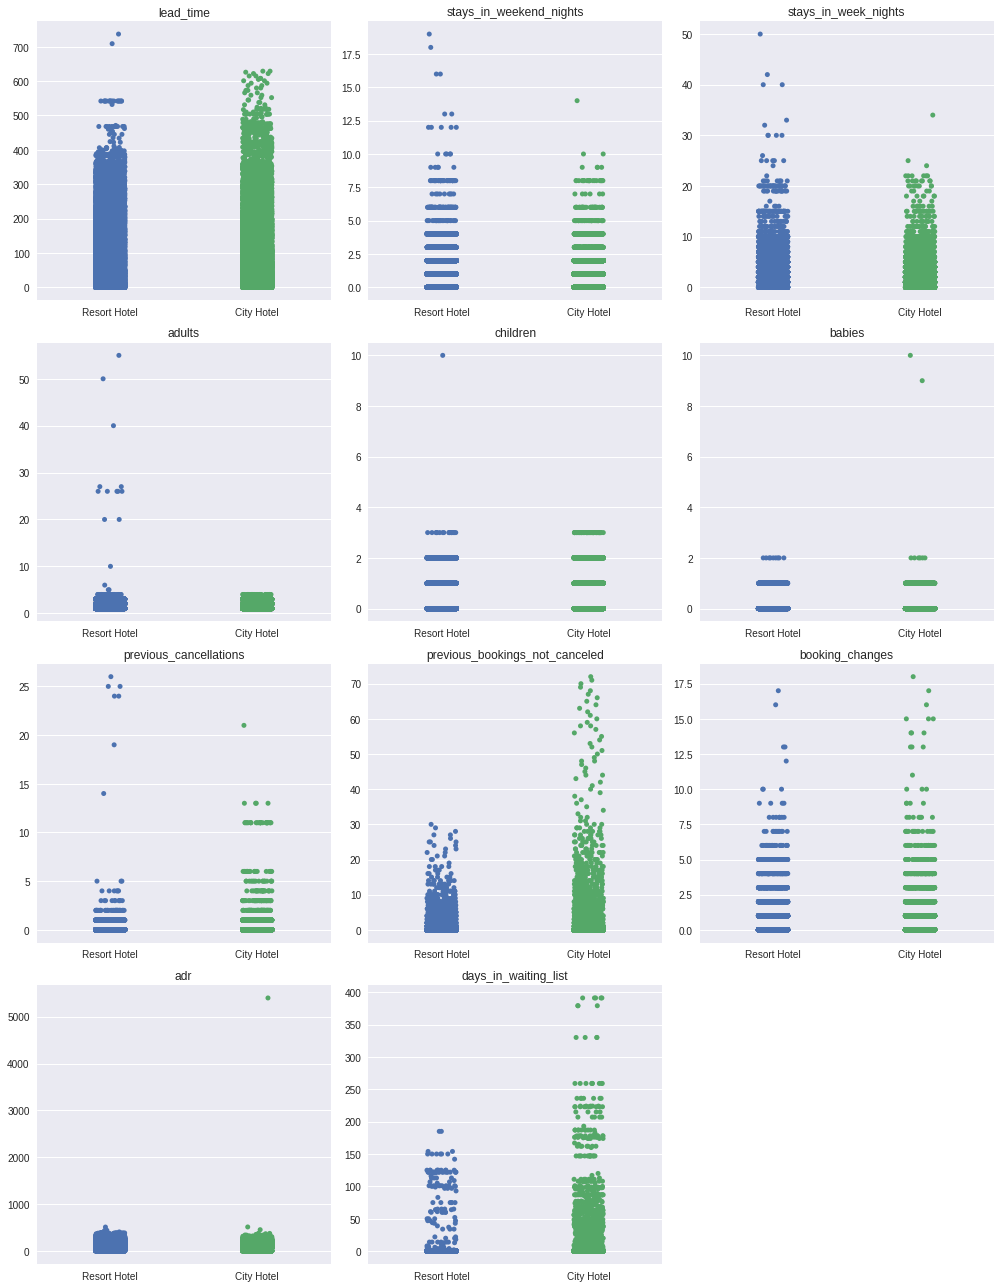

In [16]:
# Visualize differences in data distribution between city and resort hotels

numeric_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', \
    'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

plt.figure(figsize = (14, 18))

for feature in numeric_features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature]).set(xlabel = None, ylabel = None)
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()

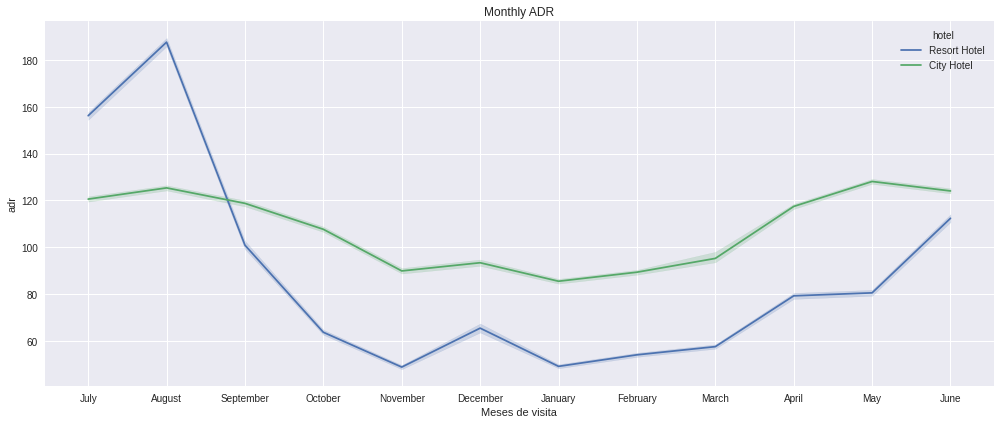

In [17]:
# ADR for the year

plt.figure(figsize = (14, 6))

months = df['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', 
            y = 'adr',
            hue = 'hotel', 
            data = df, 

            )
plt.title('Monthly ADR')
plt.xlabel('Meses de visita')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


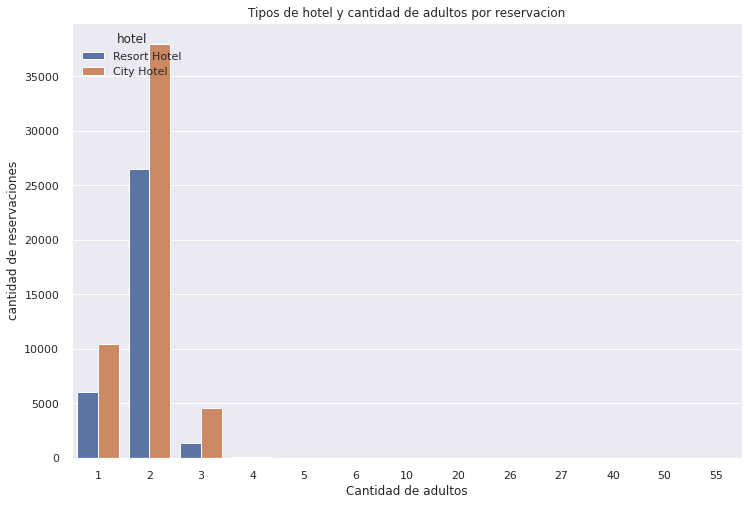

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
graph = sns.countplot('adults', hue='hotel', data=df)
graph.set(title='Tipos de hotel y cantidad de adultos por reservacion')
graph.set_xlabel('Cantidad de adultos', fontsize = 12)
graph.set_ylabel('cantidad de reservaciones', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


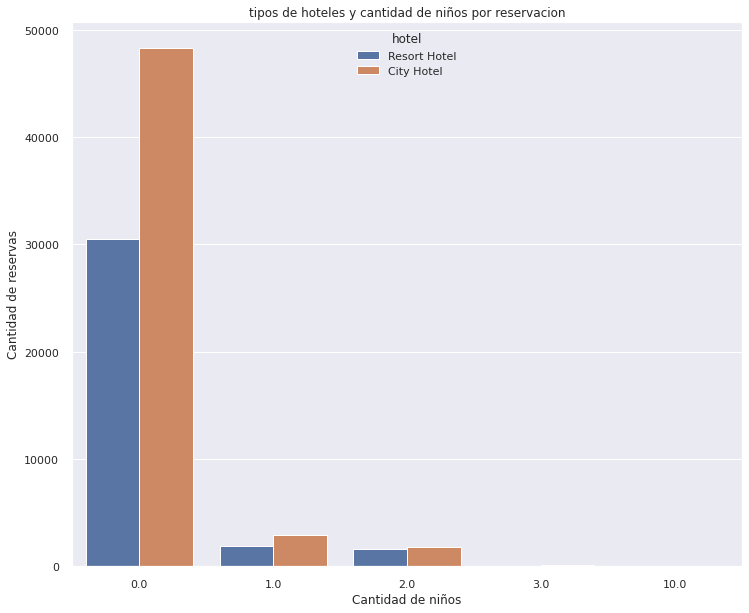

In [19]:
sns.set(rc={'figure.figsize':(12,10)})
graph = sns.countplot('children', hue='hotel', data=df)
graph.set(title='tipos de hoteles y cantidad de niños por reservacion')
graph.set_xlabel('Cantidad de niños', fontsize = 12)
graph.set_ylabel('Cantidad de reservas', fontsize = 12)
plt.show()

In [20]:
# Guest countries origin heatmaps

guest_country = df[df['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')

guest_map = px.choropleth(guest_country,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = "dense",
                    projection = 'equirectangular',
                    title="Paises mas visitados"
             )

guest_map.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



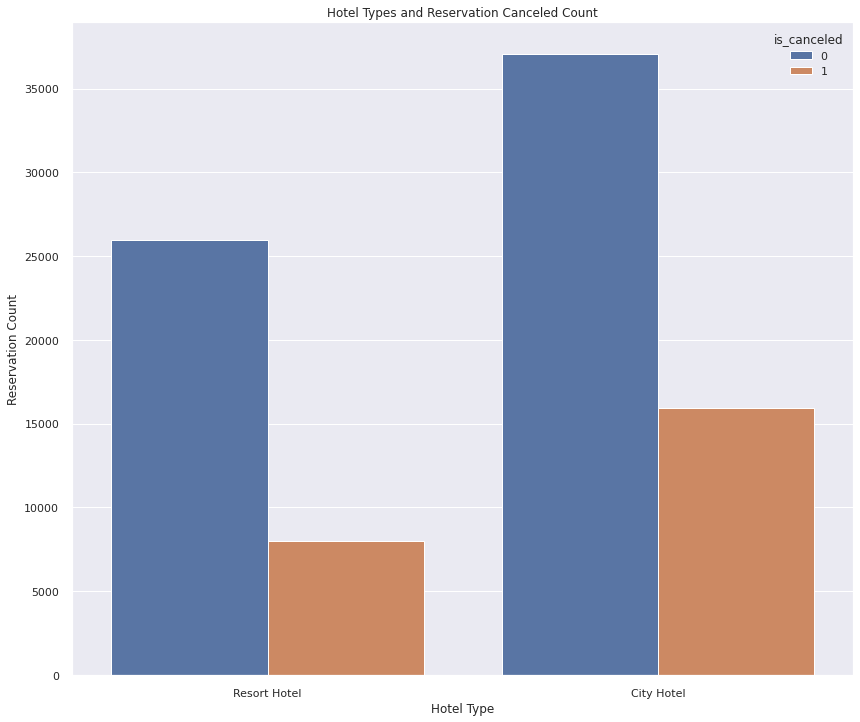

In [21]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot('hotel', hue='is_canceled', data=df)
graph.set(title='Hotel Types and Reservation Canceled Count')
graph.set_xlabel('Hotel Type', fontsize = 12)
graph.set_ylabel('Reservation Count', fontsize = 12)
plt.show()

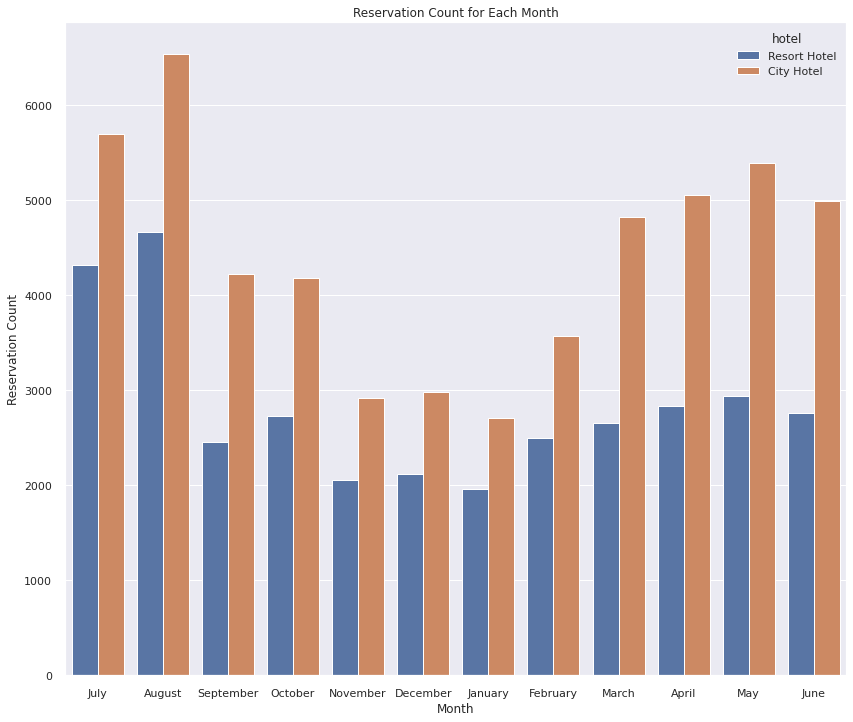

In [22]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x = 'arrival_date_month',hue='hotel', data=df)
graph.set(title='Reservation Count for Each Month')
graph.set_xlabel('Month', fontsize = 12)
graph.set_ylabel('Reservation Count', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



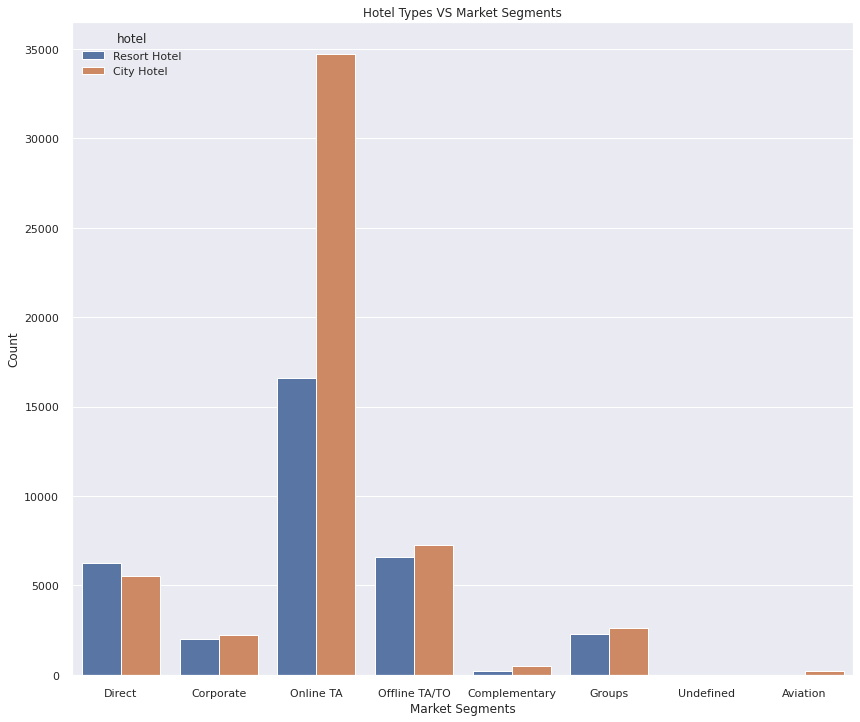

In [23]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot('market_segment', hue='hotel', data=df)
graph.set(title='Hotel Types VS Market Segments')
graph.set_xlabel('Market Segments', fontsize = 12)
graph.set_ylabel('Count', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



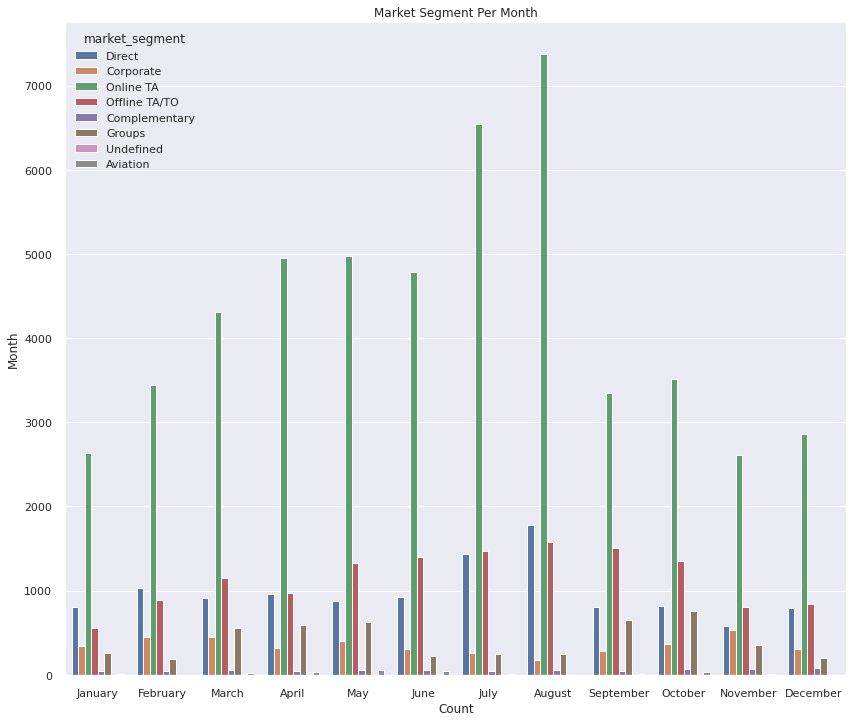

In [24]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot('arrival_date_month', hue='market_segment', data=df, order=order)
graph.set(title='Market Segment Per Month')
graph.set_xlabel('Count', fontsize = 12)
graph.set_ylabel('Month', fontsize = 12)
plt.show()

#Modelo K-means


datos con clasificacion, debo aplicar el one hot encoder aca? 


realizar transformacion de los categoricos






In [25]:
#Importar el modelo

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [26]:
# y = df['adr'] #Definir variable target y conjunto de caracteristicas
# X =df.drop(columns = 'adr')

Se definio adr ya que es un indicador importante que suele estar relacionado con la ocupacion de los viajes, como se trabaja bajo el esquema no supervisado no se requiere


In [27]:
#fecha de llegada en una columna
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [28]:
#convertir en formato de fecha
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y/%B/%d', errors='coerce')

In [29]:
df.drop(['arrival_date_year','reservation_status', 'reservation_status_date',	'arrival_date_month',	'arrival_date_week_number', 'reserved_room_type','assigned_room_type'], axis = 'columns', inplace=True)
# 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'

In [30]:
df.drop(['arrival_date'], axis = 'columns', inplace=True) #presenta error al momento de presentar la escalada

se convierten los datos de la informacion de fecha a formato numerico, se elimina posteriormente estas columnas para poder realizar un one hot encode de lo que se considera importante para una evaluacion de k-means sin crear ruidos que generen sesgo con las variables categoricas

In [31]:
df['hotel'] = df['hotel'].map({'Resort Hotel':'0', 'City Hotel':'1'}, na_action=None)


In [32]:
df = df.astype({'hotel':'int64'})

pd.to_numeric(df.hotel)

0         0
1         0
2         0
3         0
4         0
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: hotel, Length: 87011, dtype: int64

In [33]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [34]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,1,0,0,2,0.0,0,BB,...,0,0,0,3,No Deposit,0,Transient,0.0,0,0
1,0,0,737,1,0,0,2,0.0,0,BB,...,0,0,0,4,No Deposit,0,Transient,0.0,0,0
2,0,0,7,1,0,1,1,0.0,0,BB,...,0,0,0,0,No Deposit,0,Transient,75.0,0,0
3,0,0,13,1,0,1,1,0.0,0,BB,...,0,0,0,0,No Deposit,0,Transient,75.0,0,0
4,0,0,14,1,0,2,2,0.0,0,BB,...,0,0,0,0,No Deposit,0,Transient,98.0,0,1


### **Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación dummi.**

In [35]:
df = df.astype({'children':'int64', 'adr': 'int64'})

# df['children'] = df['children'].astype(int)

In [36]:
# separo mis valores cat y num en distintas variables
# Crear un selector categórico
numeric_select = make_column_selector(dtype_include='number')
categoric_select = make_column_selector(dtype_include='object')

# precedo a imprimir las colums correspondientes
num_columns = numeric_select(df)
print('numeric columns are', num_columns)
cat_columns = categoric_select(df)
print('categorical columns are', cat_columns)

numeric columns are ['hotel', 'is_canceled', 'lead_time', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
categorical columns are ['meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']


In [37]:
# df1=pd.get_dummies(df)
# num_columns = numeric_select(df1)
# print('numeric columns are', num_columns)

In [38]:
df = pd.get_dummies(df, columns=[ 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'])
#df = pd.concat([df, embarked_dummies], axis=1)

In [39]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,1,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,737,1,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,7,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,13,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,14,1,0,2,2,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,...,87011.000000,87011.000000,87011.000000,87011.000000,87011.00000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000
mean,0.609750,0.275000,79.862374,15.813265,1.004643,2.624013,1.884095,0.134132,0.010838,0.038650,...,0.002080,0.791187,0.000057,0.986841,0.01193,0.001230,0.036018,0.006206,0.824333,0.133443
std,0.487809,0.446517,86.007705,8.835787,1.027694,2.040996,0.615306,0.446642,0.113697,0.192761,...,0.045562,0.406463,0.007580,0.113957,0.10857,0.035046,0.186337,0.078534,0.380539,0.340055
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,49.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,125.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,737.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87011 entries, 0 to 119389
Columns: 220 entries, hotel to customer_type_Transient-Party
dtypes: int64(17), uint8(203)
memory usage: 30.8 MB


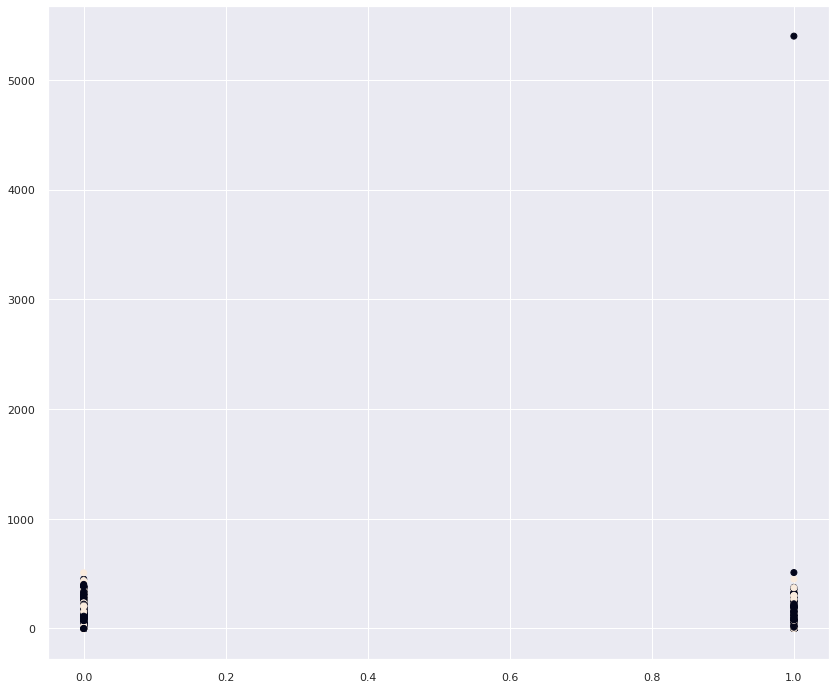

In [45]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
#plt.style.use('seaborn-palette')
#plt.style.use('ggplot')
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
#Visualize the clusters
plt.scatter(df['hotel'], df['adr'], c = df['cluster'])
# plt.xlabel('Age')
# plt.ylabel('Debts')
# plt.title('Age range respect with the Bebts');

infrmacion ya no importante

In [ ]:
#cat_selector(df) #Seleccion de columna categorica # Crear un subconjunto de datos solo para las columnas categóricas

#Bibliografia
- https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
-https://www.kaggle.com/code/amaraigboanugo/hotel-booking-analysis/report
-https://www.kaggle.com/code/shruthimshruthim/hotel-booking/notebook 
-https://www.kaggle.com/code/amoghpai/eda-with-data-cleaning-on-hotel-booking-data-set 

- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 

- https://www.kaggle.com/code/davidemad/hotel-booking-eda-prediction-model-and-pipeline

- https://ichi.pro/es/que-es-one-hot-encoding-y-como-usar-la-funcion-get-dummies-de-pandas-160729382340976

